In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat Aug 16 06:49:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [4]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN/Training/happy/download (1).jpeg')

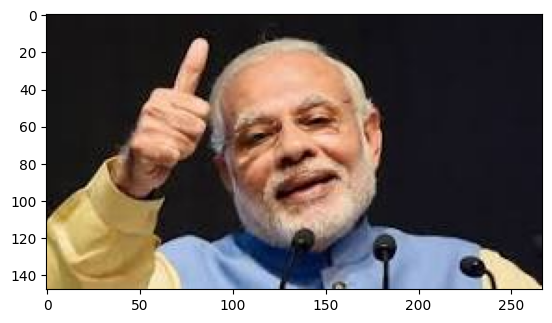

In [5]:
plt.imshow(img)

array([[[ 19,  18,  20],
        [ 19,  18,  20],
        [ 19,  18,  20],
        ...,
        [ 24,  16,  17],
        [ 24,  16,  17],
        [ 24,  16,  17]],

       [[ 19,  18,  20],
        [ 19,  18,  20],
        [ 19,  18,  20],
        ...,
        [ 24,  16,  17],
        [ 24,  16,  17],
        [ 24,  16,  17]],

       [[ 19,  18,  20],
        [ 19,  18,  20],
        [ 19,  18,  20],
        ...,
        [ 24,  16,  17],
        [ 24,  16,  17],
        [ 24,  16,  17]],

       ...,

       [[109, 179, 209],
        [106, 176, 206],
        [101, 171, 200],
        ...,
        [172, 207, 221],
        [ 69,  98, 113],
        [  0,  14,  30]],

       [[104, 174, 204],
        [102, 172, 202],
        [ 98, 168, 197],
        ...,
        [209, 245, 255],
        [174, 204, 221],
        [147, 173, 189]],

       [[100, 170, 200],
        [ 98, 168, 198],
        [ 95, 165, 194],
        ...,
        [174, 210, 226],
        [194, 227, 243],
        [210, 236, 252]]], dtype=uint8)
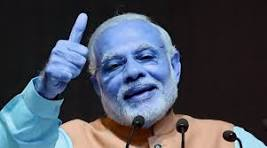

In [6]:
i1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN/Training/happy/download (1).jpeg')
i1

In [7]:
i1.shape

(148, 267, 3)

In [8]:
train=ImageDataGenerator(rescale=1/200)
validation=ImageDataGenerator(rescale=1/200)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [9]:
train_dataset= train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Training',
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')
validation_dataset= train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Validation',
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')

Found 19 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
# now we apply maxpooling
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2), # 3 filter we applied here
      #
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      ##
      tf.keras.layers.Flatten(),
      ##
      tf.keras.layers.Dense(512,activation='relu'),
      #
      tf.keras.layers.Dense(1,activation='sigmoid')])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
model_fit=model.fit(train_dataset,epochs=15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5789 - loss: 0.6732
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6842 - loss: 1.1801
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4737 - loss: 25.0470
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7368 - loss: 0.5306
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4737 - loss: 0.9755
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5263 - loss: 1.5715
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6842 - loss: 0.4916
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.4049
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9474 - loss: 0.3400
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.2773
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.8947 - loss: 0.2688
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5789 - loss: 0.

In [15]:
 dir_path='/content/drive/MyDrive/Colab Notebooks/CNN/Testing'


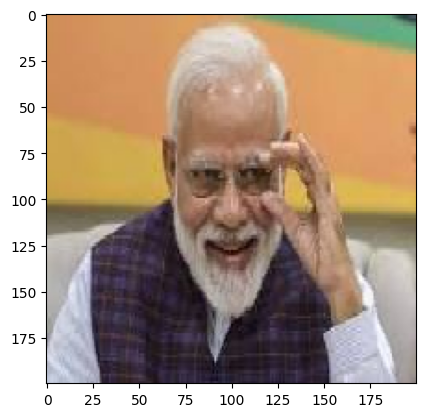

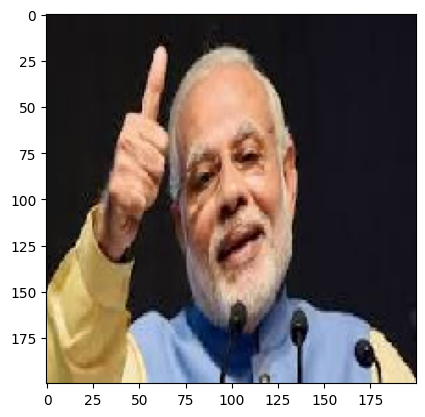

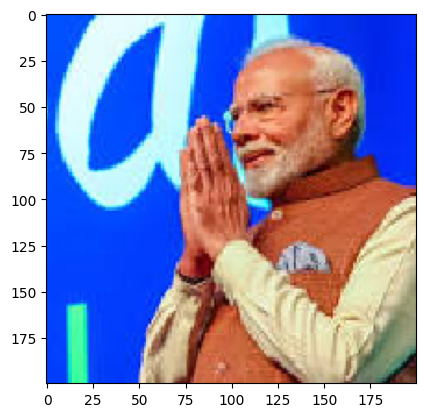

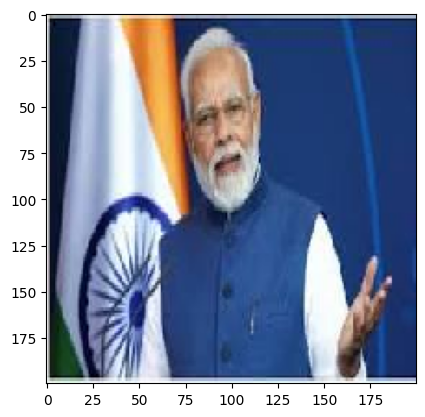

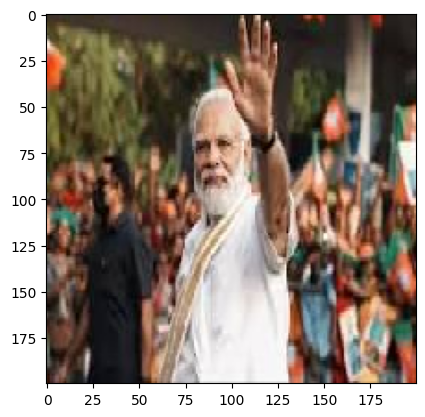

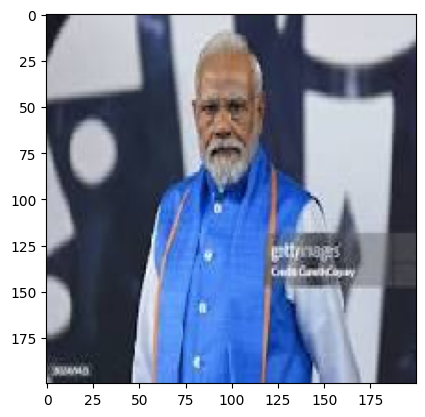

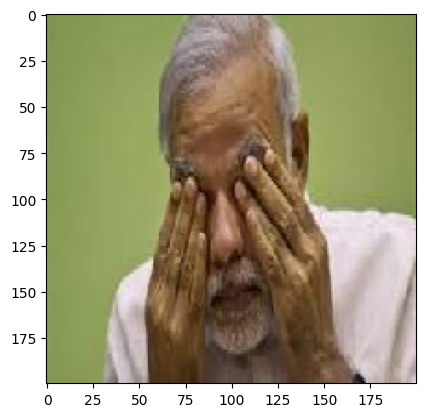

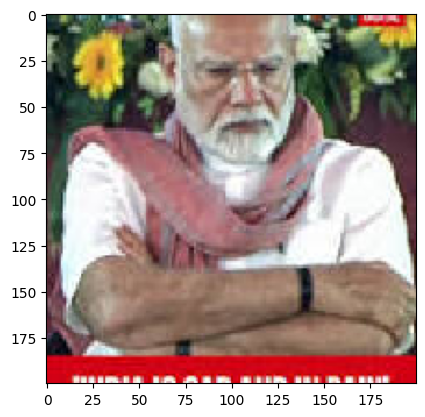

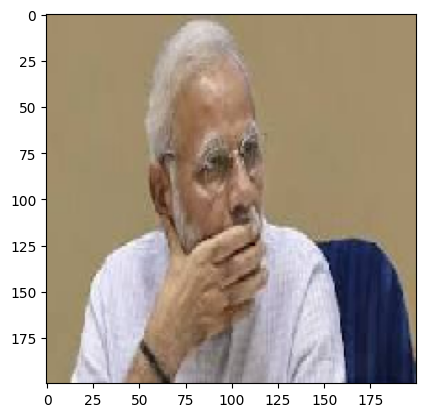

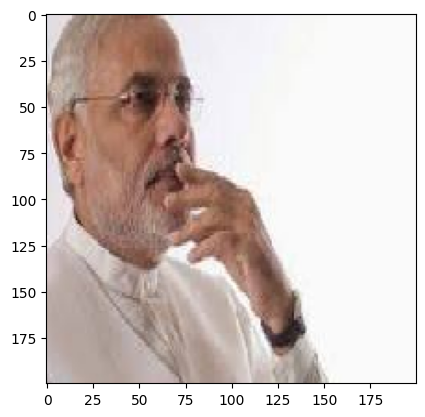

In [16]:
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+ '//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

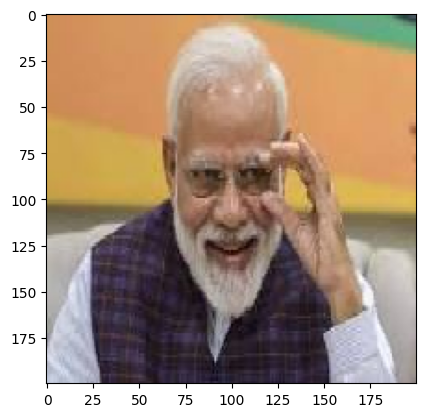

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
i m happy


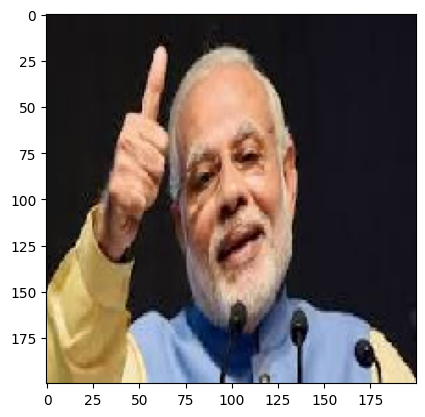

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i m happy


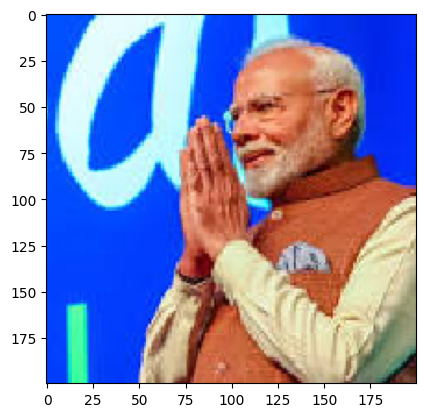

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
i m happy


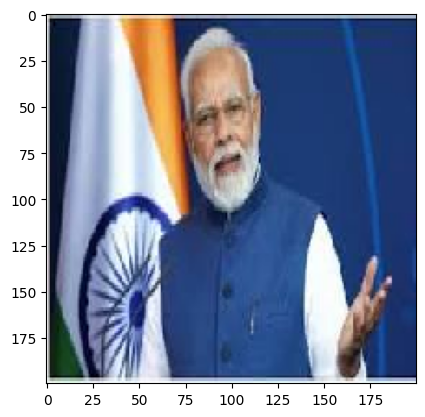

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
i m happy


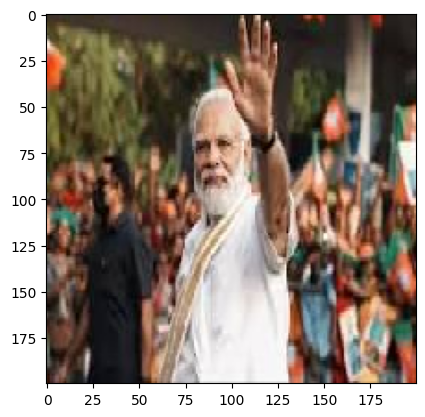

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
i m happy


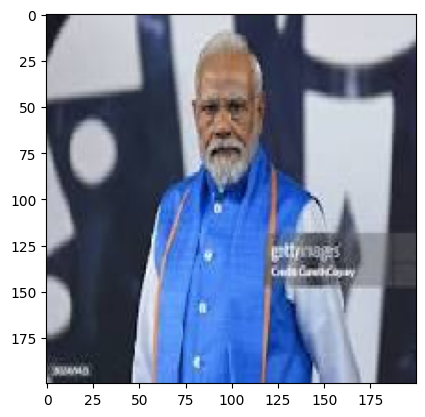

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
im not happy


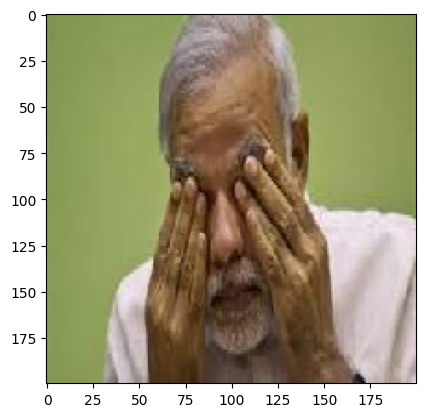

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
im not happy


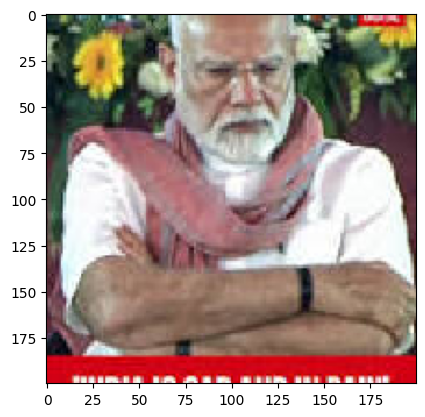

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
im not happy


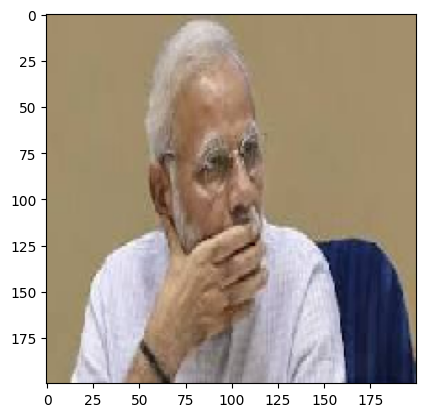

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
im not happy


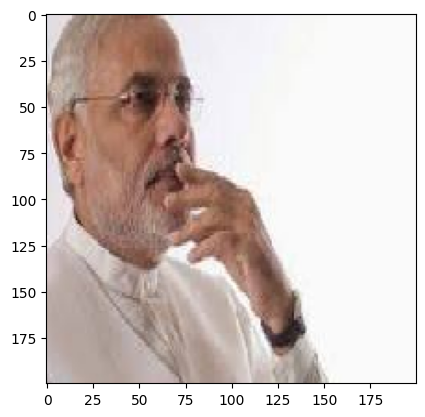

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
im not happy


In [17]:
from re import X
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+ '//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x= image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  val=model.predict(images)
  if(val==0):
    print('i m happy')
  else:
    print('im not happy')

In [18]:
!nvidia-smi

Sat Aug 16 07:13:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P0             29W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----